In [2]:
from scipy.sparse import dok_array,eye
from scipy.sparse.linalg import norm 
from plt_utils import *

def power(P,n):
   if n%2==0 and n!=0:
        Q = power(P,n/2)
        return Q@Q 
   return power(P,n-1)@P if n!=0 else eye(P.shape[0])

def power_convergence(P,max_iter,eps =10**(-12)):
    Q=P
    for _ in range(max_iter):
        Qnew = Q@Q
        Qnew1 = P@Qnew
        if norm(Q-Qnew)<eps and norm(Qnew-Qnew1):break
        Q = Qnew1
    return Q 

def stripping_matrix(P,lcm_periods):
    return sum(power(P,j) for j in range(lcm_periods))/lcm_periods

def stationary_matrix(P,lcm_periods,iter=15, eps = 10**(-10)):
    Pn = power_convergence(P,iter,eps)
    Pn.data[Pn.data < eps] = 0
    Pn.eliminate_zeros()
    return Pn@stripping_matrix(P,lcm_periods)  

def stationary_matrix2(P,iter):
    I = eye(P.shape[0])
    B = I
    BB = [B]
    for i in range(1,iter):
        B = (i*P@B + I)/(i+1)
        BB.append(B)
    return BB

In [3]:
P1 = dok_array((9,9))
P1[0,1] = 0.3
P1[0,2]= 0.7
P1[1,3] =1
P1[2,3]=1
P1[3,4]=1
P1[4,0] =1
P1[5,0] = 0.25
P1[5,1] = 0.25
P1[5,7] = 0.25
P1[5,8] = 0.25
P1[6,5] = 0.5
P1[6,3] = 0.5
P1[7,8] = 1
P1[8,7] = 1
print(P1.toarray())

[[0.   0.3  0.7  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.   0.   0.   0.   0.   0.25 0.25]
 [0.   0.   0.   0.5  0.   0.5  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]]


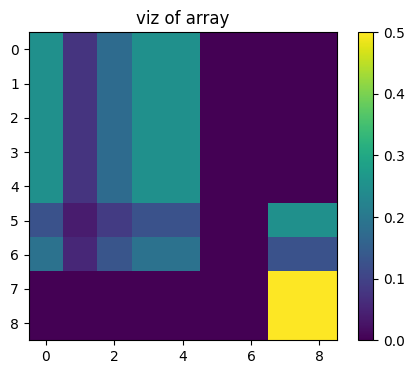

interactive(children=(IntSlider(value=0, description='index', max=999), Output()), _dom_classes=('widget-inter…

In [4]:
B1 = stationary_matrix(P1,4,2)
BB1 = stationary_matrix2(P1,1000)
visualize_array(B1)
intPP(BB1)